In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import gudhi as gd
import gudhi.representations as gdr
import gudhi.tensorflow.perslay as gdtp

In [18]:
diagrams = [np.array([[0.,4.], [1.,2.], [3.,8.], [6.,8.]]), np.array([[3.,6.], [4.,5.]])]

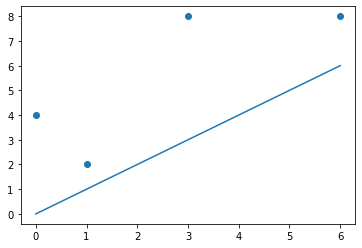

In [19]:
plt.scatter(diagrams[0][:,0], diagrams[0][:,1])
plt.plot([0.,6.], [0.,6.])
plt.show()

In [20]:
diagrams = gdr.DiagramScaler(use=True, scalers = [([0,1], MinMaxScaler())]).fit_transform(diagrams)

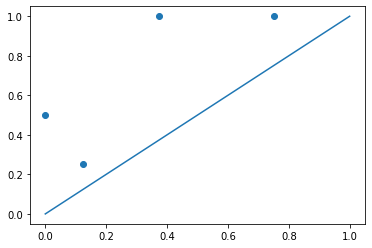

In [21]:
plt.scatter(diagrams[0][:,0], diagrams[0][:,1])
plt.plot([0.,1.], [0.,1.])
plt.show()

In [22]:
diagrams = tf.concat([
    tf.RaggedTensor.from_tensor(tf.constant(diagrams[0][None, :], dtype = tf.float32)),
    tf.RaggedTensor.from_tensor(tf.constant(diagrams[1][None, :], dtype = tf.float32)),
], axis=0)

In [23]:
# landscape
with tf.GradientTape() as tape:
    rho = tf.identity
    phi = gdtp.TentPerslayPhi(np.array(np.arange(-1.,2.,.001), dtype = np.float32))
    weight = gdtp.PowerPerslayWeight(1.,0.)
    perm_op = "top3"
    
    perslay = gdtp.Perslay(phi=phi, rho=rho, weight = weight, perm_op = perm_op)
    vectors = perslay(diagrams)

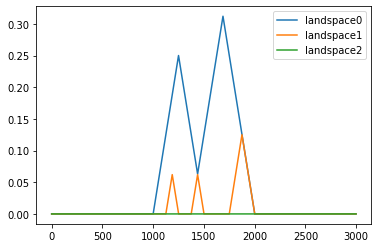

In [24]:
plt.figure()
vectors = np.reshape(vectors[0,:], [-1, 3])
for k in range(3):
    plt.plot(vectors[:, k], label="landspace"+str(k))
plt.legend()
plt.show()

In [29]:
# Betti curve
with tf.GradientTape() as tape:
    rho = tf.identity
    phi = gdtp.FlatPerslayPhi(np.array(np.arange(-1.,2.,.001), dtype = np.float32), 50.)
    weight = gdtp.PowerPerslayWeight(1.,0.)
    perm_op = tf.math.reduce_sum
    
    perslay = gdtp.Perslay(phi=phi, rho=rho, weight = weight, perm_op = perm_op)
    vectors = perslay(diagrams)

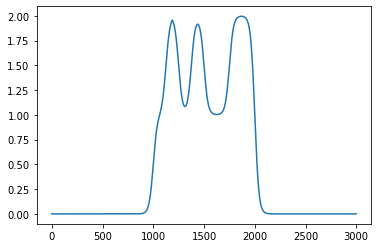

In [31]:
plt.figure()
plt.plot(vectors[0,:])
plt.show()

In [32]:
# Persistence image
with tf.GradientTape() as tape:
    rho = tf.identity
    phi = gdtp.GaussianPerslayPhi((100,100), ((-.5, 1.5), (-.5,1.5)), .1)
    weight = gdtp.PowerPerslayWeight(1.,2.)
    perm_op = tf.math.reduce_sum
    
    perslay = gdtp.Perslay(phi=phi, rho=rho, weight = weight, perm_op = perm_op)
    vectors = perslay(diagrams)

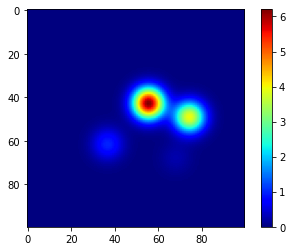

In [34]:
plt.figure()
plt.imshow(np.flip(vectors[0,:,:,0]), cmap="jet")
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

In [36]:
# Persistence image
with tf.GradientTape() as tape:
    rho = tf.identity
    phi = gdtp.GaussianPerslayPhi((100,100), ((-.5, 1.5), (-.5,1.5)), .1)
    weight = gdtp.GaussianMixturePerslayWeight(np.array([[0.], [.25], [1], [1]], dtype = np.float32))
    perm_op = tf.math.reduce_sum
    
    perslay = gdtp.Perslay(phi=phi, rho=rho, weight = weight, perm_op = perm_op)
    vectors = perslay(diagrams)

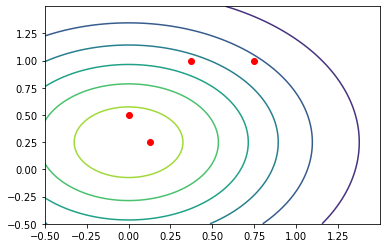

In [38]:
means = weight.W[:2,:].numpy()
var = weight.W[2:,:].numpy()

x,y = np.arange(-.5, 1.5, 0.001), np.arange(-.5, 1.5, 0.001)
xx, yy = np.meshgrid(x, y)
z = np.zeros(xx.shape)
for idx_g in range(means.shape[1]):
    z += np.exp(-((xx - means[0, idx_g])**2 * (var[0, idx_g])**2 + (yy - means[1, idx_g])**2 * (var[1,idx_g])**2))
plt.contour(xx,yy,z)
plt.scatter(diagrams[0][:,0], diagrams[0][:,1], color = "red")
plt.show()

In [39]:
# Persistence image
with tf.GradientTape() as tape:
    rho = tf.identity
    phi = gdtp.GaussianPerslayPhi((100,100), ((-.5, 1.5), (-.5,1.5)), .1)
    weight = gdtp.GridPerslayWeight(np.array(np.random.uniform(size=[100,100]), dtype=np.float32), ((-0.01, 1.01), (-0.01, 1.01)))
    perm_op = tf.math.reduce_sum
    
    perslay = gdtp.Perslay(phi=phi, rho=rho, weight = weight, perm_op = perm_op)
    vectors = perslay(diagrams)

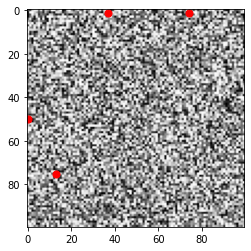

In [43]:
W = np.flip(weight.grid.numpy(), 0)
plt.figure()
plt.imshow(W, cmap = "Greys", zorder = 1)
((xm,xM), (ym, yM)) = weight.grid_bnds
[xs, ys] = weight.grid.shape
plt.scatter([int(xs * (x - xm)/ (xM - xm)) for x in diagrams[0][:,0]],
           [ys - int (ys * (y - ym)/ (yM - ym) ) for y in diagrams[0][:,1]],
           s = 50, color = "red", zorder = 2
           )
plt.show()